In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm  as cm
import numpy.ma as ma
import pickle

----------

In [2]:
def load_params(file):
    with open(file, 'rb') as f:
        params = pickle.load(f)

In [3]:
with open('../../data/Nyles/plume_ref4/param.pkl', 'rb') as f:
    params = pickle.load(f)

In [4]:
params

{'modelname': 'LES',
 'geometry': 'closed',
 'Lx': 4000.0,
 'Ly': 4000.0,
 'Lz': 2000.0,
 'n_tracers': 0,
 'unit_length': 'm',
 'unit_duration': 's',
 'rotating': True,
 'forced': True,
 'coriolis': 0.0001,
 'diff_coef': {},
 'datadir': '/home1/scratch/groullet/data/Nyles',
 'expname': 'plume_ref4',
 'mode': 'overwrite',
 'variables_in_history': ['b', 'u'],
 'timestep_history': 600.0,
 'simplified_grid': True,
 'include_halo': False,
 'disk_space_warning': 0.5,
 'show': False,
 'iterations_per_frame': 4,
 'style': 'b-interface',
 'stable_stratification': False,
 'aspect': 'equal',
 'rotation_speed': 3,
 'tend': 86400.0,
 'timestepping': 'LFAM3',
 'auto_dt': True,
 'dt': 200.0,
 'cfl': 0.8,
 'dt_max': 200.0,
 'global_nx': 32,
 'global_ny': 32,
 'global_nz': 16,
 'orderVF': 5,
 'orderKE': 5,
 'orderA': 5,
 'npx': 2,
 'npy': 2,
 'npz': 1,
 'nh': 3,
 'npre': 3,
 'npost': 3,
 'ndeepest': 20,
 'omega': 0.8,
 'tol': 0.001,
 'maxite': 20,
 'nglue': 1,
 'ncellscoarsest': 32,
 'nx': 16,
 'ny': 1

In [5]:
var = 'w'
t = 140

r_max = 1700

with open('../../data/Nyles/plume_ref4/param.pkl', 'rb') as f:
    params = pickle.load(f)
    
npx = params['npx']
npy = params['npy']
npz = params['npz']
number_domains = npx*npy*npz # so far only works for no. < 100
Lx = params['Lx']
Ly = params['Ly']
Lz = params['Lz']
x0 = Lx/2 # center point in the x domain
y0 = Ly/2 # center point in the y domain
nz = params['nz']

means = np.zeros((n_time, nz))
for i in range(number_domains):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(nz):
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/number_domains

NameError: name 'n_time' is not defined

In [172]:
n_file = 1
file_path = f'../../data/Nyles/plume_ref4/plume_ref4_{n_file:02d}_hist.nc'

In [173]:
path

'../../data/Nyles/plume_ref4/plume_ref4_03_hist.nc'

In [8]:
field = {}
grid = {}

for i in range(0,1):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    print(path)
    with Dataset(path, 'r') as nc:
        print(list(nc.variables))
        print('NN' in nc.variables)
        field[f'b_{i:01d}'] = nc['b'][:].data
        grid[f'x_{i:01d}'] = nc['x'][:].data
        grid[f'y_{i:01d}'] = nc['y'][:].data

../../data/Nyles/plume_ref4/plume_ref4_00_hist.nc
['n', 't', 'x', 'y', 'z', 'b', 'u', 'v', 'w']
False


In [175]:
field['b_0'].shape

(145, 16, 16, 16)

In [176]:
x = y = np.linspace(0, 4000, 32)

In order to orient myself I plot the different domains.

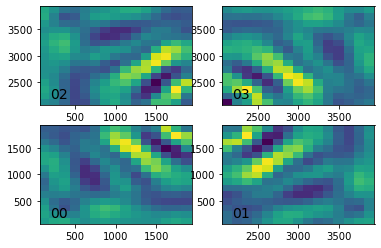

In [180]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    ax.pcolormesh(XX, YY, field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

Using a mask to chop the nudging

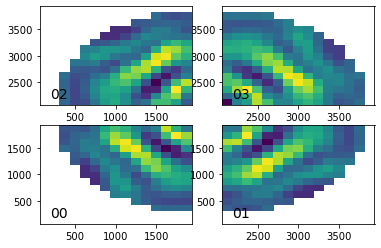

In [181]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    b = field[f'b_{i}'][t, 8, :, :]
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    d = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(d, 0, 1800)
    
    b_new = ma.masked_array(b, mask.mask)
    ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

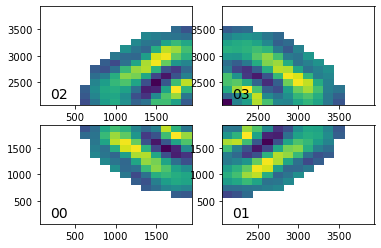

In [182]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    b = field[f'b_{i}'][t, 8, :, :]
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    d = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(d, 0, 1500)
    
    b_new = ma.masked_array(b, mask.mask)
    ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)
    

# horizontal mean for the whole domain

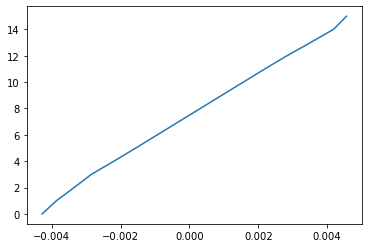

In [183]:
t = 140
x0 = 2000
y0 = 2000
n_levels = 16
r_max = 1700

means = np.zeros((n_levels))

for level in range(n_levels):
    #level = 6

    mean_level = 0
    for i in range(0, 4):
       
        b = field[f'b_{i}'][t, level, :, :]
        k = (i+2)%4 + 1

        #ax = plt.subplot(2,2,k)
        XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
        r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
        mask = ma.masked_outside(r, 0, r_max)
        b_new = ma.masked_array(b, mask.mask)
        mean_level += b_new.mean()

        #print(i, b.mean(), b_new.mean())
        #ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
        #ax.text(XX[1,1],YY[1,1], i, size=14)

    means[level] = mean_level/4

plt.plot(means, range(16))

## for a 4D array in subdomains

obj: wrap this in a function

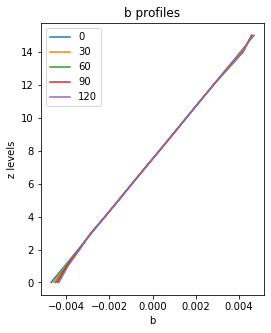

In [184]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel('b')
plt.ylabel('z levels')
plt.title(var + ' profiles')
plt.legend()

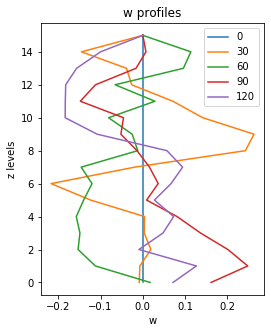

In [185]:
var = 'w'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel(var)
plt.ylabel('z levels')
plt.title( var + ' profiles')
plt.legend()

Small test: I average an array of ones

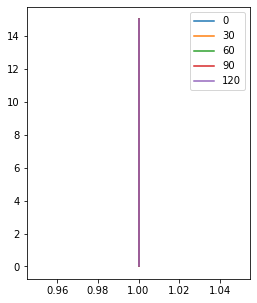

In [186]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            test_field = np.ones_like(r)
            field_new = ma.masked_array(test_field, mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    
plt.legend()

seems to work

TO DO:
-  Algorithm to take averages without merging subdomains
- function to compute offline variables, like $N^2$, vorticity, kinetic and potential energy, etc.
- Compute the terms in energy balance equations

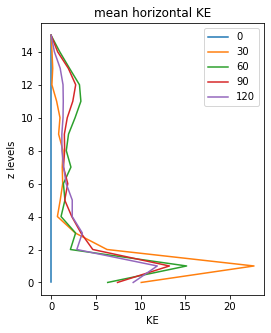

In [170]:
var = 'w'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        x = nc['x'][:].data
        y = nc['y'][:].data
        u = nc[var][:].data
        v = nc[var][:].data 
        w = nc[var][:].data
        
    KE = (u**2 + v**2 + w**2)/2
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            field_new = ma.masked_array(KE[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel('KE')
plt.ylabel('z levels')
plt.title('mean horizontal KE')
plt.legend()

In [152]:
path = f'../../data/Nyles/plume_ref4/plume_ref4_00_hist.nc'
    
with Dataset(path, 'r') as nc:
    b = nc['b'][:].data
    z = nc['z'][:].data

In [156]:
np.diff(z)[0]

125.0

In [149]:
b.shape

(145, 16, 16, 16)

$N^2 = - \frac{g}{\rho_0} \frac{\partial \rho}{\partial z}$

$N^2 = -\partial_z b$

In [158]:
NN = - np.diff(b, axis=1)/np.diff(z)[0]

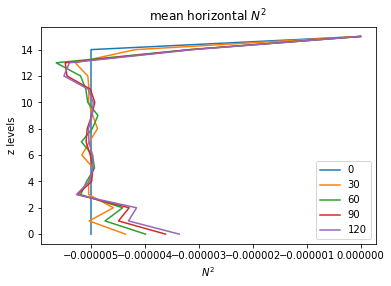

In [167]:
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        b = nc['b'][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        z = nc['z'][:].data
        
    NN = - np.diff(b, axis=1)/np.diff(z)[0]
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels-1):
            field_new = ma.masked_array(NN[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

#plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel(r'$N^2$')
plt.ylabel('z levels')
plt.title(r'mean horizontal $N^2$')
plt.legend()

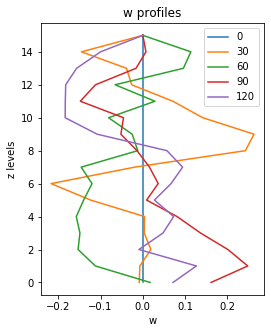

In [169]:
var = 'w'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel(var)
plt.ylabel('z levels')
plt.title( var + ' profiles')
plt.legend()